In [ ]:
### Imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

### Create DataFrame

df = pd.read_excel('/content/drive/MyDrive/Projeto OC/Calcular Ondas de Calor/Tabelas_Resumo/banco_dados_climaticos_consolidado.xlsx')
start = pd.to_datetime('1981-01-01')
end = pd.to_datetime('2023-12-31')
df = df[(df['index'] >= start) & (df['index'] <= end)]

Mounted at /content/drive


# Dias de onda de calor

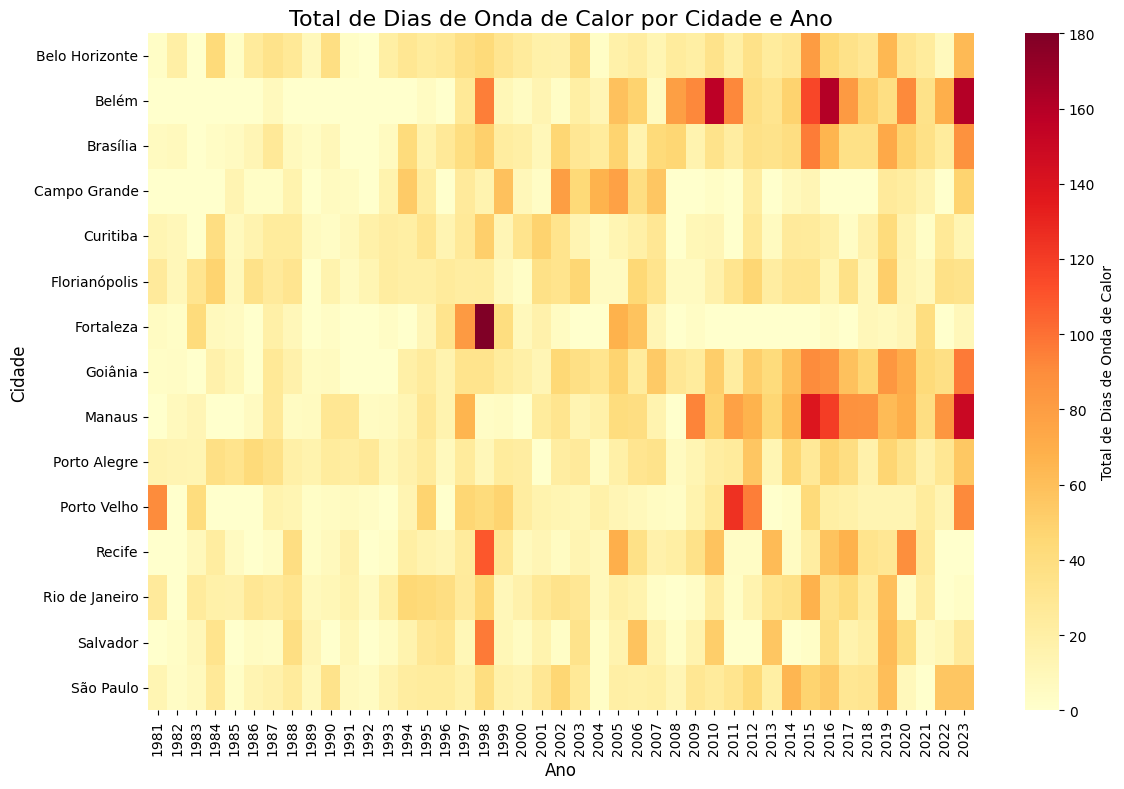

In [ ]:
# Contar o total de dias de onda de calor (True em isHW) por cidade e ano
dias_hw_por_ano = df[df['isHW']].groupby(['cidade', 'year']).size().reset_index(name='total_dias_hw')

# Pivotar os dados para o formato necessário ao heatmap
tabela_heatmap = dias_hw_por_ano.pivot(index='cidade', columns='year', values='total_dias_hw').fillna(0)

# Criar o gráfico do tipo heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    tabela_heatmap,
    annot=False,
    fmt='.0f',
    cmap='YlOrRd',
    cbar_kws={'label': 'Total de Dias de Onda de Calor'}
)
plt.title('Total de Dias de Onda de Calor por Cidade e Ano', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Cidade', fontsize=12)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

In [ ]:
# Identificar os primeiros dias de cada onda de calor
df['primeiro_dia_hw'] = (df['isHW'] == True) & (df['isHW'].shift(1) == False)

# Filtrar apenas os primeiros dias de cada onda de calor
primeiros_dias_hw = df[df['primeiro_dia_hw']]

# Contar os valores únicos de 'HW_Intensity' por cidade
contagem_hw_intensity = primeiros_dias_hw.groupby('cidade')['HW_Intensity'].value_counts().unstack(fill_value=0)

# Renomear as colunas para uma nomenclatura mais amigável
contagem_hw_intensity.rename(columns={
    'low-intensity': 'Contagem_Low_Intensity',
    'severe': 'Contagem_Severe',
    'extreme': 'Contagem_Extreme'
}, inplace=True)

# Salvar a tabela em um arquivo Excel
arquivo_excel = "contagem_hw_intensity_por_cidade.xlsx"
contagem_hw_intensity.to_excel(arquivo_excel)

# Fazer o download do arquivo no Google Colab
from google.colab import files
files.download(arquivo_excel)

print("A tabela foi gerada e o download foi iniciado!")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

A tabela foi gerada e o download foi iniciado!


# ICEA tem mesmo menos ondas de calor do que o INMET

In [ ]:
# Definir os grupos de cidades
grupo1 = ['Manaus', 'Belém', 'Salvador', 'Recife', 'Brasília', 'Goiânia', 'São Paulo', 'Belo Horizonte', 'Porto Alegre']
grupo2 = ['Florianópolis', 'Curitiba', 'Rio de Janeiro', 'Campo Grande', 'Fortaleza', 'Porto Velho']

# Identificar os primeiros dias de cada onda de calor
df['primeiro_dia_hw'] = (df['isHW'] == True) & (df['isHW'].shift(1) == False)

# Filtrar apenas os primeiros dias das ondas de calor
df_primeiros_dias = df[df['primeiro_dia_hw']]

# Contar o número total de ondas de calor por cidade
contagem_oc = df_primeiros_dias.groupby('cidade')['primeiro_dia_hw'].sum().reset_index()
contagem_oc.rename(columns={'primeiro_dia_hw': 'total_hw'}, inplace=True)

# Calcular a média de ondas de calor para cada grupo
media_grupo1 = contagem_oc[contagem_oc['cidade'].isin(grupo1)]['total_hw'].mean()
media_grupo2 = contagem_oc[contagem_oc['cidade'].isin(grupo2)]['total_hw'].mean()

# Exibir as médias
print(f"Média de ondas de calor no Grupo 1 (cidades {grupo1}): {media_grupo1:.2f}")
print(f"Média de ondas de calor no Grupo 2 (cidades {grupo2}): {media_grupo2:.2f}")

# Comparação dos grupos
if media_grupo1 > media_grupo2:
    print("O Grupo 1 tem, em média, mais ondas de calor.")
elif media_grupo1 < media_grupo2:
    print("O Grupo 2 tem, em média, mais ondas de calor.")
else:
    print("Os dois grupos têm a mesma média de ondas de calor.")

Média de ondas de calor no Grupo 1 (cidades ['Manaus', 'Belém', 'Salvador', 'Recife', 'Brasília', 'Goiânia', 'São Paulo', 'Belo Horizonte', 'Porto Alegre']): 184.22
Média de ondas de calor no Grupo 2 (cidades ['Florianópolis', 'Curitiba', 'Rio de Janeiro', 'Campo Grande', 'Fortaleza', 'Porto Velho']): 145.00
O Grupo 1 tem, em média, mais ondas de calor.


# Gerando um heatmap do número de ondas de calor por cidade e ano

In [ ]:
# Recalcular os primeiros dias de cada onda de calor
df['primeiro_dia_hw'] = (df['isHW'] == True) & (df['isHW'].shift(1) == False)

# Contar o número de ondas de calor por cidade
contagem_ondas_cidade = df[df['primeiro_dia_hw']].groupby('cidade').size().reset_index(name='total_ondas_calor')

# Mostrar a tabela
print(contagem_ondas_cidade)

# Salvar a tabela como arquivo Excel
arquivo_excel = "total_ondas_calor_por_cidade.xlsx"
contagem_ondas_cidade.to_excel(arquivo_excel, index=False)

# Fazer o download do arquivo no Google Colab
from google.colab import files
files.download(arquivo_excel)

print("A tabela de contagem foi recalculada e o download foi iniciado!")

            cidade  total_ondas_calor
0   Belo Horizonte                188
1            Belém                234
2         Brasília                185
3     Campo Grande                131
4         Curitiba                145
5    Florianópolis                170
6        Fortaleza                 93
7          Goiânia                210
8           Manaus                211
9     Porto Alegre                179
10     Porto Velho                163
11          Recife                143
12  Rio de Janeiro                168
13        Salvador                117
14       São Paulo                191


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

A tabela de contagem foi recalculada e o download foi iniciado!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

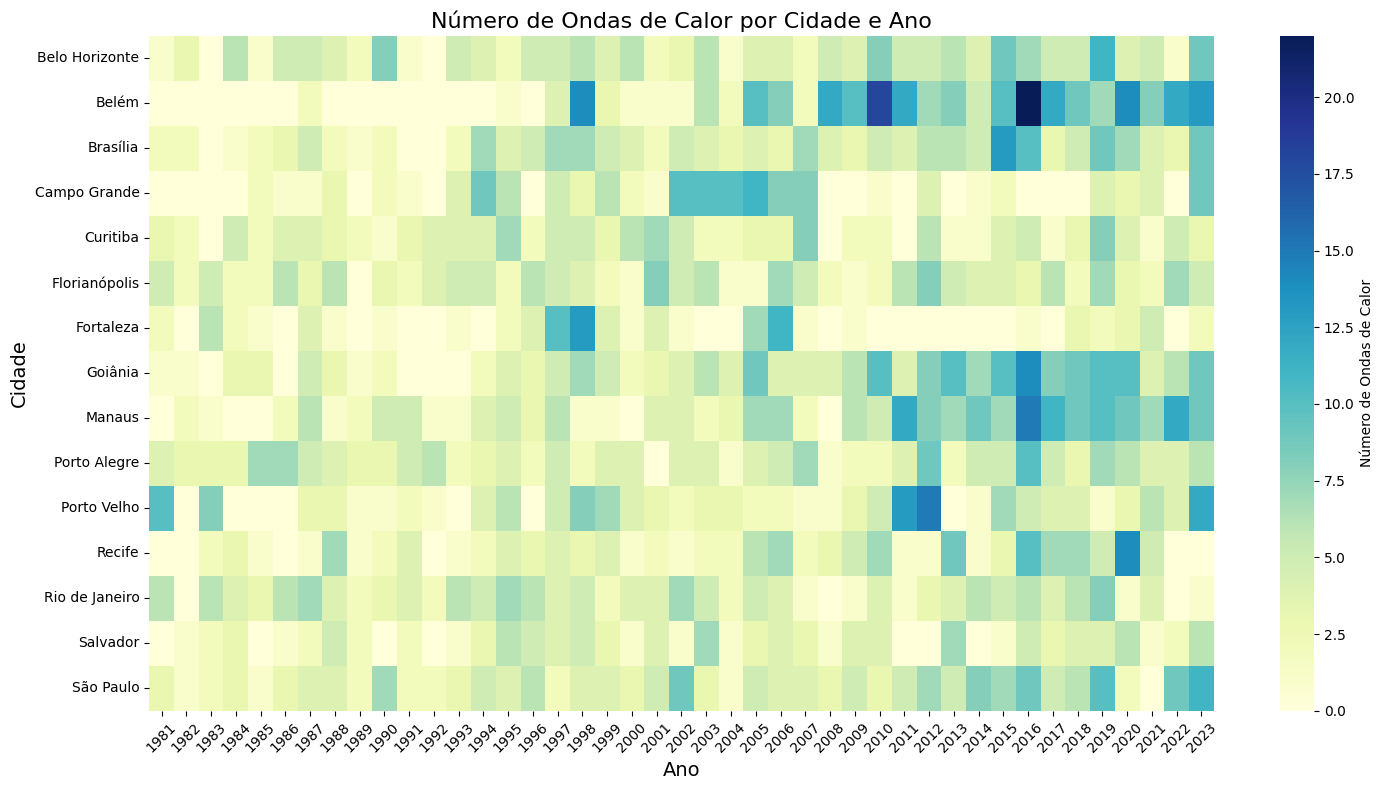

In [ ]:
# Recalcular os primeiros dias de cada onda de calor
df['primeiro_dia_hw'] = (df['isHW'] == True) & (df['isHW'].shift(1) == False)

# Contar o número de ondas de calor por cidade e ano
contagem_ondas_cidade_ano = (
    df[df['primeiro_dia_hw']]
    .groupby(['cidade', df['index'].dt.year])
    .size()
    .reset_index(name='total_ondas_calor')
)

# Criar uma tabela pivô para o heatmap
tabela_pivot_ano = contagem_ondas_cidade_ano.pivot(index='cidade', columns='index', values='total_ondas_calor').fillna(0)

# Exportar a tabela para um arquivo Excel
arquivo_excel = "total_ondas_calor_por_cidade_e_ano.xlsx"
tabela_pivot_ano.to_excel(arquivo_excel)

# Fazer o download do arquivo no Google Colab
from google.colab import files
files.download(arquivo_excel)

# Gerar o heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(tabela_pivot_ano, annot=False, fmt='.0f', cmap='YlGnBu', cbar_kws={'label': 'Número de Ondas de Calor'})
plt.title('Número de Ondas de Calor por Cidade e Ano', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Cidade', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Criar uma nova coluna para os períodos
def definir_periodo(ano):
    if 1981 <= ano <= 1990:
        return '1981-1990'
    elif 1991 <= ano <= 2000:
        return '1991-2000'
    elif 2001 <= ano <= 2010:
        return '2001-2010'
    elif 2011 <= ano <= 2023:
        return '2011-2023'

df['periodo'] = df['index'].dt.year.map(definir_periodo)

# Recalcular os primeiros dias de cada onda de calor
df['primeiro_dia_hw'] = (df['isHW'] == True) & (df['isHW'].shift(1) == False)

# Contar o número de ondas de calor por cidade e período
contagem_ondas_cidade_periodo = (
    df[df['primeiro_dia_hw']]
    .groupby(['cidade', 'periodo'])
    .size()
    .reset_index(name='total_ondas_calor')
)

# Criar uma tabela pivô
tabela_pivot_periodo = contagem_ondas_cidade_periodo.pivot(index='cidade', columns='periodo', values='total_ondas_calor').fillna(0)

# Exibir a tabela
print(tabela_pivot_periodo)

# Exportar a tabela para um arquivo Excel
arquivo_excel = "total_ondas_calor_por_cidade_e_periodo.xlsx"
tabela_pivot_periodo.to_excel(arquivo_excel)

# Fazer o download do arquivo no Google Colab
from google.colab import files
files.download(arquivo_excel)

print("Tabela exportada com sucesso!")

periodo         1981-1990  1991-2000  2001-2010  2011-2023
cidade                                                    
Belo Horizonte         35         38         39         76
Belém                   2         23         70        139
Brasília               20         41         40         84
Campo Grande            9         36         59         27
Curitiba               26         43         34         42
Florianópolis          34         36         38         62
Fortaleza              17         35         25         16
Goiânia                19         28         54        109
Manaus                 19         27         40        125
Porto Alegre           42         37         30         70
Porto Velho            26         37         25         75
Recife                 17         26         37         63
Rio de Janeiro         41         45         33         49
Salvador               16         30         32         39
São Paulo              30         35         42         

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tabela exportada com sucesso!


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Supondo que o dataframe tenha sido carregado no Google Colab como 'df_ondas'
df_ondas = pd.read_excel('/content/drive/MyDrive/Projeto OC/Calcular Ondas de Calor/Tabelas_Resumo/total_ondas_calor_por_cidade_e_ano.xlsx')

# Transformar o dataframe de wide format para long format
df_long = df_ondas.reset_index().melt(
    id_vars='index',
    value_vars=[col for col in df_ondas.columns if isinstance(col, int)],
    var_name='ano',
    value_name='total_ondas_calor'
)
df_long.rename(columns={'index': 'cidade'}, inplace=True)

# Garantir que a coluna 'ano' seja numérica (já está, mas por precaução)
df_long['ano'] = pd.to_numeric(df_long['ano'])

# Lista para armazenar os resultados
resultados = []

# Realizar a regressão linear para cada cidade
for cidade in df_long['cidade'].unique():
    # Filtrar os dados da cidade
    dados_cidade = df_long[df_long['cidade'] == cidade]

    # Variável independente (ano) e dependente (total de ondas de calor)
    X = dados_cidade['ano']
    y = dados_cidade['total_ondas_calor']

    # Adicionar constante para o modelo
    X = sm.add_constant(X)

    # Ajustar o modelo de regressão linear
    modelo = sm.OLS(y, X).fit()

    # Extrair o coeficiente e p-valor da variável 'ano'
    coeficiente = modelo.params['ano']
    p_valor = modelo.pvalues['ano']

    # Salvar os resultados
    resultados.append({
        'Cidade': cidade,
        'Coeficiente': coeficiente,
        'P-Valor': p_valor,
        'Significativo': 'Sim' if p_valor < 0.05 else 'Não'
    })

# Criar um DataFrame com os resultados
df_resultados = pd.DataFrame(resultados)

# Ordenar por significância (p-valor)
df_resultados = df_resultados.sort_values(by='P-Valor')

# Exibir os resultados
print(df_resultados)

# Exportar para Excel
arquivo_resultados = "resultados_regressao_cidades.xlsx"
df_resultados.to_excel(arquivo_resultados, index=False)

# Fazer o download do arquivo no Google Colab
from google.colab import files
files.download(arquivo_resultados)

print("Análise concluída! Resultados exportados para Excel.")

    Cidade  Coeficiente       P-Valor Significativo
7        7     0.214588  1.252810e-09           Sim
1        1     0.357445  2.278408e-09           Sim
8        8     0.233313  4.775600e-09           Sim
2        2     0.131682  2.459654e-05           Sim
14      14     0.108124  3.351476e-04           Sim
11      11     0.106765  3.769223e-03           Sim
0        0     0.085171  4.022764e-03           Sim
13      13     0.046663  6.798883e-02           Não
10      10     0.076563  8.778233e-02           Não
9        9     0.032014  2.119527e-01           Não
12      12    -0.028390  2.847743e-01           Não
5        5     0.027635  2.931609e-01           Não
3        3     0.038659  3.785412e-01           Não
6        6    -0.014799  7.047502e-01           Não
4        4     0.007400  7.750765e-01           Não


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Análise concluída! Resultados exportados para Excel.


# Download de uma tabela com a quantidade de OC por ano e por cidade

In [ ]:
from google.colab import files

# Criar uma nova coluna para os períodos
def definir_periodo(ano):
    if 1981 <= ano <= 1990:
        return '1981-1990'
    elif 1991 <= ano <= 2000:
        return '1991-2000'
    elif 2001 <= ano <= 2010:
        return '2001-2010'
    elif 2011 <= ano <= 2023:
        return '2011-2023'

resultados['periodo'] = resultados['year'].apply(definir_periodo)

# Agrupar por cidade e período, somando os períodos de OC
tabela_periodos = resultados.groupby(['cidade', 'periodo'])['n_periodos'].sum().reset_index()

# Transformar a tabela em um formato pivô (linhas: cidades, colunas: períodos)
tabela_pivot_periodos = tabela_periodos.pivot(index='cidade', columns='periodo', values='n_periodos')

# Salvar a tabela reorganizada em um arquivo Excel
arquivo_excel_periodos = 'ondas_calor_por_cidade_periodo.xlsx'
tabela_pivot_periodos.to_excel(arquivo_excel_periodos)

# Fazer o download do arquivo Excel
files.download(arquivo_excel_periodos)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Meses mais comuns de ocorrência de OC em cada cidade e porcentagem de OC que acontecem nesses meses

In [ ]:
# Adicionar uma coluna com o nome dos meses (opcional para exibição)
df['mes_nome'] = df['index'].dt.month_name()
df_oc = df[df['isHW'] == True]

# Contar ocorrências de OC por cidade e mês
contagem_mensal = df_oc.groupby(['cidade', 'mes', 'mes_nome']).size().reset_index(name='n_oc')

# Identificar os 3 meses mais frequentes para cada cidade
top3_meses = contagem_mensal.sort_values(['cidade', 'n_oc'], ascending=[True, False]) \
                            .groupby('cidade').head(3)

# Calcular a soma das OC para os top 3 meses por cidade
soma_top3 = top3_meses.groupby('cidade')['n_oc'].sum().reset_index(name='soma_top3')

# Calcular a soma total de OC para cada cidade
soma_total = contagem_mensal.groupby('cidade')['n_oc'].sum().reset_index(name='soma_total')

# Combinar os resultados para calcular a porcentagem
resultado = soma_top3.merge(soma_total, on='cidade')
resultado['percentual_top3'] = (resultado['soma_top3'] / resultado['soma_total']) * 100

# Exibir os meses mais frequentes
top3_meses_formatado = top3_meses.groupby('cidade')['mes_nome'].apply(list).reset_index()
resultado = resultado.merge(top3_meses_formatado, on='cidade')

# Exibir os resultados
print(resultado)

# Para exportar os dados para um Excel (opcional):
arquivo_resultado = 'percentual_top3_meses_com_nomes.xlsx'
resultado.to_excel(arquivo_resultado, index=False)

# Fazer download do Excel no Colab
from google.colab import files
files.download(arquivo_resultado)

KeyError: 'mes'

# Duração média das OC em cada período

In [ ]:
# Definir os períodos
def definir_periodo(ano):
    if 1981 <= ano <= 1990:
        return '1981-1990'
    elif 1991 <= ano <= 2000:
        return '1991-2000'
    elif 2001 <= ano <= 2010:
        return '2001-2010'
    elif 2011 <= ano <= 2023:
        return '2011-2023'

# Adicionar coluna do ano e do período
df['ano'] = df['index'].dt.year
df['periodo'] = df['ano'].apply(definir_periodo)

# Identificar as ondas de calor (sequências de True na coluna isHW)
df['grupo_hw'] = (df['isHW'] != df['isHW'].shift()).cumsum()  # Identificar grupos consecutivos de isHW

# Filtrar apenas as ondas de calor
ondas_calor = df[df['isHW'] == True]

# Calcular a duração de cada onda de calor
ondas_calor_duracao = ondas_calor.groupby(['cidade', 'grupo_hw', 'periodo']).size().reset_index(name='duracao')

# Calcular a duração média das ondas de calor por cidade e período
duracao_media = ondas_calor_duracao.groupby(['cidade', 'periodo'])['duracao'].mean().reset_index(name='duracao_media')

# Transformar a tabela em formato pivô (opcional)
duracao_pivot = duracao_media.pivot(index='cidade', columns='periodo', values='duracao_media')

# Exibir os resultados
print(duracao_pivot)

# Salvar em Excel (opcional)
arquivo_excel = 'duracao_media_oc_cidade_periodo.xlsx'
duracao_pivot.to_excel(arquivo_excel)

# Fazer download no Colab
from google.colab import files
files.download(arquivo_excel)

periodo         1981-1990  1991-2000  2001-2010  2011-2023
cidade                                                    
Belo Horizonte   5.800000   6.368421   5.333333   6.421053
Belém            4.000000   6.260870   7.042857   7.294964
Brasília         4.300000   5.487805   7.750000   7.547619
Campo Grande     4.777778   5.750000   6.288136   5.740741
Curitiba         5.538462   5.558140   5.441176   5.404762
Florianópolis    6.823529   4.555556   6.157895   5.919355
Fortaleza        5.705882  10.285714   6.560000   5.250000
Goiânia          4.842105   6.000000   6.611111   7.256881
Manaus           5.000000   6.407407   8.125000   8.768000
Porto Alegre     5.952381   5.162162   5.966667   6.485714
Porto Velho      6.461538   6.270270   5.280000   6.346667
Recife           5.411765   9.230769   7.459459   6.365079
Rio de Janeiro   4.682927   5.977778   4.969697   7.020408
Salvador         6.562500   7.266667   6.687500   7.128205
São Paulo        5.133333   5.428571   5.547619   6.0357

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Adicionar coluna do ano e do período
df['ano'] = df['index'].dt.year

# Identificar as ondas de calor (sequências de True na coluna isHW)
df['grupo_hw'] = (df['isHW'] != df['isHW'].shift()).cumsum()  # Identificar grupos consecutivos de isHW

# Filtrar apenas as ondas de calor
ondas_calor = df[df['isHW'] == True]

# Calcular a duração de cada onda de calor
ondas_calor_duracao = ondas_calor.groupby(['cidade', 'grupo_hw', 'ano']).size().reset_index(name='duracao')

# Calcular a duração média das ondas de calor por cidade e período
duracao_media = ondas_calor_duracao.groupby(['cidade', 'ano'])['duracao'].mean().reset_index(name='duracao_media')

# Transformar a tabela em formato pivô (opcional)
duracao_pivot = duracao_media.pivot(index='cidade', columns='ano', values='duracao_media')

# Exibir os resultados
print(duracao_pivot)

# Salvar em Excel (opcional)
arquivo_excel = 'duracao_media_oc_cidade_ano.xlsx'
duracao_pivot.to_excel(arquivo_excel)

# Fazer download no Colab
from google.colab import files
files.download(arquivo_excel)

ano                 1981      1982       1983       1984      1985      1986  \
cidade                                                                         
Belo Horizonte  3.000000  6.666667        NaN   7.166667  3.000000  5.000000   
Belém                NaN       NaN        NaN        NaN       NaN       NaN   
Brasília        3.500000  4.000000        NaN   4.000000  3.000000  4.000000   
Campo Grande         NaN       NaN        NaN        NaN  7.000000  3.000000   
Curitiba        4.333333  5.000000        NaN   7.800000  4.000000  3.750000   
Florianópolis   5.200000  5.000000   6.200000  16.000000  4.500000  5.833333   
Fortaleza       2.500000  3.000000   7.000000   4.000000  6.000000       NaN   
Goiânia         3.000000  4.000000        NaN   5.666667  3.666667       NaN   
Manaus               NaN  4.000000  12.000000        NaN       NaN  3.000000   
Porto Alegre    3.750000  4.666667   4.333333   9.250000  4.714286  6.142857   
Porto Velho     9.000000       NaN   5.1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

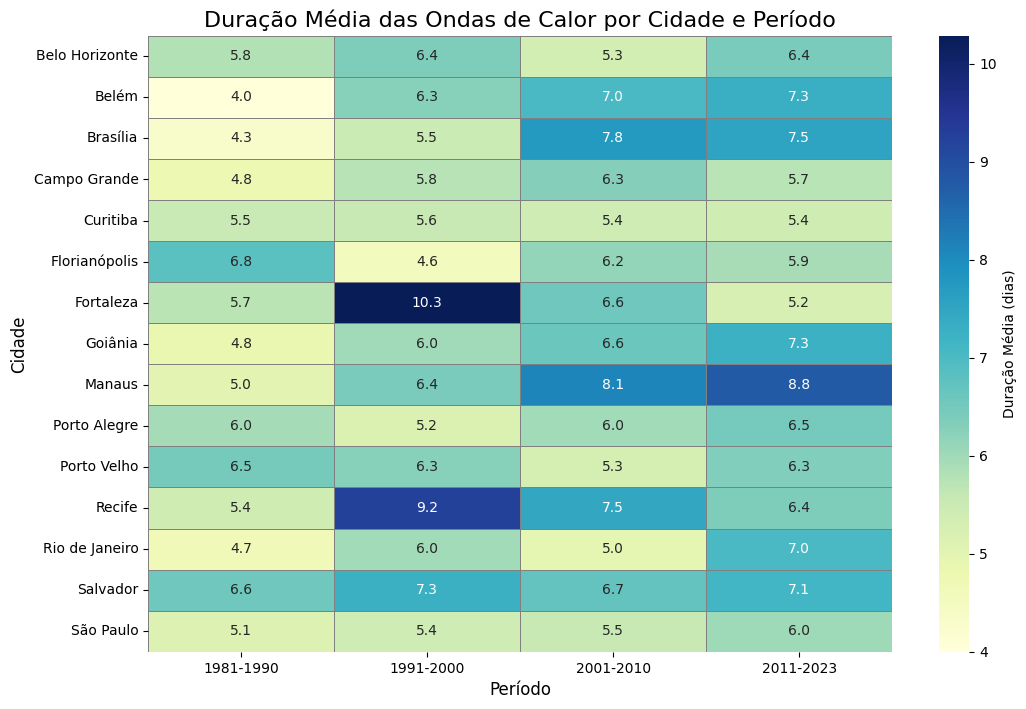

In [ ]:
# Gerar o Heatmap para a duração média das ondas de calor
plt.figure(figsize=(12, 8))
sns.heatmap(duracao_pivot, annot=True, fmt='.1f', cmap='YlGnBu', cbar_kws={'label': 'Duração Média (dias)'},
            linewidths=0.5, linecolor='gray')

# Ajustar título e labels
plt.title('Duração Média das Ondas de Calor por Cidade e Período', fontsize=16)
plt.xlabel('Período', fontsize=12)
plt.ylabel('Cidade', fontsize=12)

# Exibir o gráfico
plt.show()

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Supondo que o dataframe tenha sido carregado no Google Colab como 'df_ondas'
df_duracao = pd.read_excel('/content/drive/MyDrive/Projeto OC/Calcular Ondas de Calor/Tabelas_Resumo/duracao_media_oc_cidade_ano.xlsx')

# Transformar o dataframe de wide format para long format
df_long = df_duracao.reset_index().melt(
    id_vars='index',
    value_vars=[col for col in df_duracao.columns if isinstance(col, int)],
    var_name='ano',
    value_name='duracao_ondas_calor'
)
df_long.rename(columns={'index': 'cidade'}, inplace=True)

# Garantir que a coluna 'ano' seja numérica (já está, mas por precaução)
df_long['ano'] = pd.to_numeric(df_long['ano'])

# Substituir valores nulos por 0 na coluna 'duracao_ondas_calor'
df_long['duracao_ondas_calor'] = df_long['duracao_ondas_calor'].fillna(0)

# Lista para armazenar os resultados
resultados = []

# Realizar a regressão linear para cada cidade
for cidade in df_long['cidade'].unique():
    # Filtrar os dados da cidade
    dados_cidade = df_long[df_long['cidade'] == cidade]

    # Variável independente (ano) e dependente (total de ondas de calor)
    X = dados_cidade['ano']
    y = dados_cidade['duracao_ondas_calor']

    # Adicionar constante para o modelo
    X = sm.add_constant(X)

    # Ajustar o modelo de regressão linear
    modelo = sm.OLS(y, X).fit()

    # Extrair o coeficiente e p-valor da variável 'ano'
    coeficiente = modelo.params['ano']
    p_valor = modelo.pvalues['ano']

    # Salvar os resultados
    resultados.append({
        'Cidade': cidade,
        'Coeficiente': coeficiente,
        'P-Valor': p_valor,
        'Significativo': 'Sim' if p_valor < 0.05 else 'Não'
    })

# Criar um DataFrame com os resultados
df_resultados = pd.DataFrame(resultados)

# Ordenar por significância (p-valor)
df_resultados = df_resultados.sort_values(by='P-Valor')

# Exibir os resultados
print(df_resultados)

# Exportar para Excel
arquivo_resultados = "resultados_regressao_duracao.xlsx"
df_resultados.to_excel(arquivo_resultados, index=False)

# Fazer o download do arquivo no Google Colab
from google.colab import files
files.download(arquivo_resultados)

print("Análise concluída! Resultados exportados para Excel.")

    Cidade  Coeficiente       P-Valor Significativo
1        1     0.219534  5.068352e-08           Sim
2        2     0.148114  2.071032e-07           Sim
7        7     0.136191  1.270004e-04           Sim
8        8     0.165406  6.128740e-04           Sim
10      10     0.070240  4.881486e-02           Sim
0        0     0.041989  1.175807e-01           Não
13      13     0.059729  2.255233e-01           Não
6        6    -0.037260  3.680066e-01           Não
3        3     0.029796  4.237750e-01           Não
9        9     0.016767  4.300450e-01           Não
12      12     0.015321  5.743626e-01           Não
14      14     0.010783  6.175860e-01           Não
11      11     0.031135  6.522418e-01           Não
4        4     0.011853  6.742074e-01           Não
5        5    -0.004750  8.685393e-01           Não


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Análise concluída! Resultados exportados para Excel.


# Umidade média das OC por Grande Região

In [ ]:
# Função para definir os períodos
def definir_periodo(ano):
    if 1981 <= ano <= 1990:
        return '1981-1990'
    elif 1991 <= ano <= 2000:
        return '1991-2000'
    elif 2001 <= ano <= 2010:
        return '2001-2010'
    elif 2011 <= ano <= 2023:
        return '2011-2023'

# Adicionar colunas de ano e período ao dataframe
df['ano'] = df['index'].dt.year
df['periodo'] = df['ano'].apply(definir_periodo)

# Filtrar apenas as ondas de calor
df_hw = df[df['isHW'] == True]

# Calcular a umidade média para cada cidade e período
mean_hw_humidity = df_hw.groupby(['cidade', 'periodo'])['Mean_HW_Humidity'].mean().reset_index()

# Pivotar a tabela para melhor visualização
mean_hw_humidity_pivot = mean_hw_humidity.pivot(index='cidade', columns='periodo', values='Mean_HW_Humidity')

# Exibir a tabela
print(mean_hw_humidity_pivot)

# Exportar a tabela para um arquivo Excel
arquivo_excel = 'umidade_media_oc_cidade_periodo.xlsx'
mean_hw_humidity_pivot.to_excel(arquivo_excel)

# Fazer o download do arquivo no Google Colab
from google.colab import files
files.download(arquivo_excel)

periodo         1981-1990  1991-2000  2001-2010  2011-2023
cidade                                                    
Belo Horizonte  58.476355  55.638430  52.347115  51.174590
Belém           81.425000  80.851389  76.824138  77.352959
Brasília        48.202326  44.555111  42.870968  45.248738
Campo Grande    46.360465  54.460724  52.490417  46.806663
Curitiba        76.587169  81.058238  79.591138  78.019772
Florianópolis   78.084319  80.890739  80.608807  77.963950
Fortaleza       75.425258  73.634234  69.859476  72.529301
Goiânia         45.665217  47.133333  43.438375  43.493173
Manaus          72.045263  66.847977  71.442154  64.754653
Porto Alegre    71.478800  71.161780  71.170391  70.408150
Porto Velho     74.295514  76.408246  74.921687  68.824773
Recife          73.081522  72.153333  71.676812  70.615461
Rio de Janeiro  69.548363  71.857829  69.543628  72.803717
Salvador        75.130476  77.586697  76.133645  75.611511
São Paulo       65.351299  64.794737  63.459657  65.1536

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-36-d68f14a4ee27>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cidades_selecionadas['primeiro_dia_hw'] = (df_cidades_selecionadas['isHW'] == True) & (df_cidades_selecionadas['isHW'].shift(1) == False)


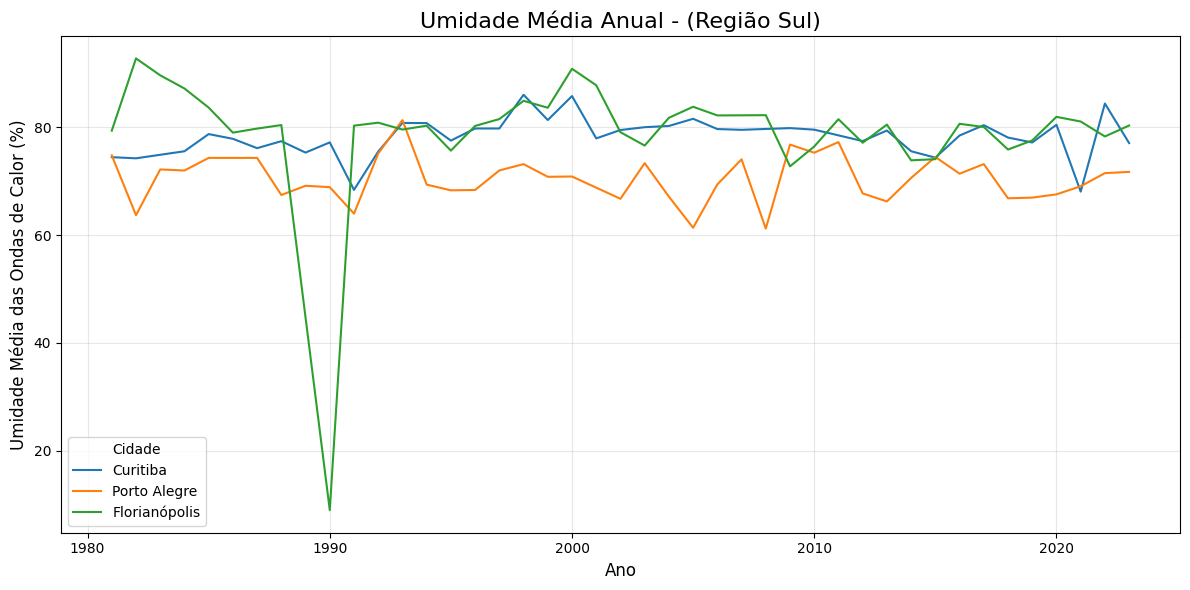

In [ ]:
# Filtrar os dados para as 3 cidades desejadas
cidades_selecionadas = ['Curitiba', 'Porto Alegre', 'Florianópolis']
df_cidades_selecionadas = df[df['cidade'].isin(cidades_selecionadas)]

# Identificar os primeiros dias de cada onda de calor
df_cidades_selecionadas['primeiro_dia_hw'] = (df_cidades_selecionadas['isHW'] == True) & (df_cidades_selecionadas['isHW'].shift(1) == False)

# Filtrar apenas os primeiros dias das ondas de calor
df_primeiros_dias = df_cidades_selecionadas[df_cidades_selecionadas['primeiro_dia_hw']]

# Calcular a anomalia média anual considerando apenas os primeiros dias das ondas de calor
anomalia_media_anual = df_primeiros_dias.groupby(['cidade', 'year'])['Mean_HW_Humidity'].mean().reset_index()

# Criar o gráfico de linha
plt.figure(figsize=(12, 6))
for cidade in cidades_selecionadas:
    dados_cidade = anomalia_media_anual[anomalia_media_anual['cidade'] == cidade]
    plt.plot(dados_cidade['year'], dados_cidade['Mean_HW_Humidity'], label=cidade)

# Adicionar rótulos e título
plt.title('Umidade Média Anual - (Região Sul)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Umidade Média das Ondas de Calor (%)', fontsize=12)
plt.legend(title='Cidade', fontsize=10)
plt.grid(alpha=0.3)

# Mostrar o gráfico
plt.tight_layout()
plt.show()

# Distância média para a última OC

In [ ]:
# Identificar os primeiros dias de cada onda de calor
# São os dias onde `isHW == True` e o dia anterior é `isHW == False`
df['primeiro_dia_hw'] = (df['isHW'] == True) & (df['isHW'].shift(1) == False)

# Filtrar apenas os primeiros dias de cada onda de calor
df_primeiros_dias = df[df['primeiro_dia_hw']]

# Calcular a média de 'days_since_HW' para cada cidade e período
mean_days_since_hw = df_primeiros_dias.groupby(['cidade', 'periodo'])['days_since_HW'].mean().reset_index()

# Pivotar a tabela para melhor visualização
mean_days_since_hw_pivot = mean_days_since_hw.pivot(index='cidade', columns='periodo', values='days_since_HW')

# Exibir a tabela no notebook
print(mean_days_since_hw_pivot)

# Exportar a tabela para um arquivo Excel
arquivo_excel = 'media_dias_desde_oc.xlsx'
mean_days_since_hw_pivot.to_excel(arquivo_excel)

# Fazer o download do arquivo no Google Colab
from google.colab import files
files.download(arquivo_excel)

KeyError: 'periodo'

<ipython-input-4-778ad466f40d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_primeiros_dias['year'] = df_primeiros_dias['index'].dt.year
<ipython-input-4-778ad466f40d>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_primeiros_dias['periodo'] = df_primeiros_dias['year'].apply(classificar_periodo)


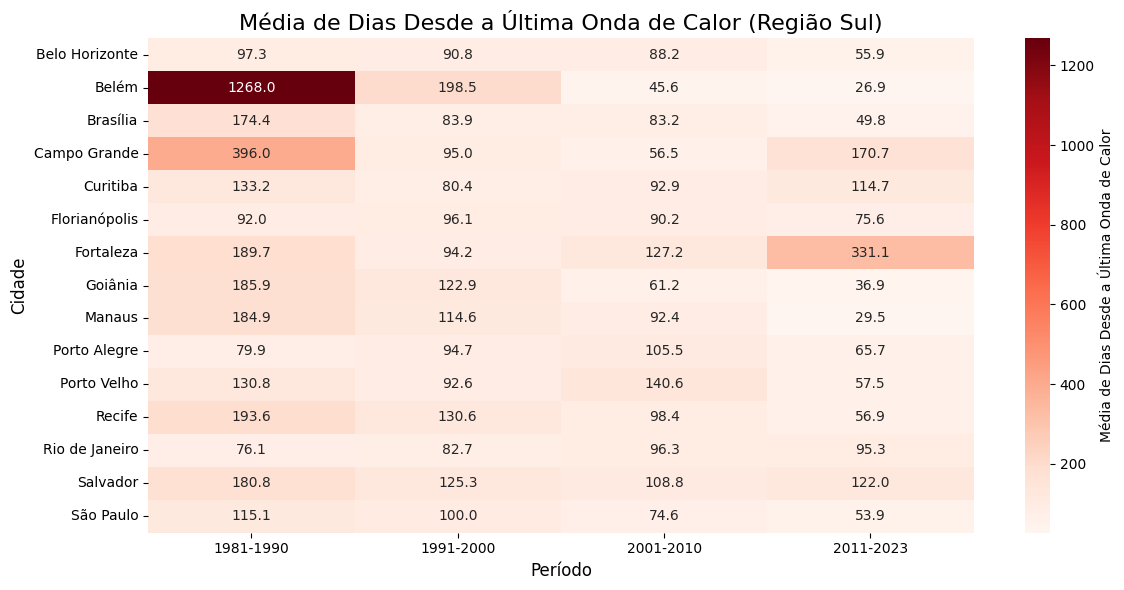

In [ ]:
# Filtrar os dados para as 3 cidades desejadas
cidades_selecionadas = ['Belo Horizonte', 'Belém', 'Brasília', 'Campo Grande', 'Curitiba', 'Florianópolis', 'Fortaleza', 'Goiânia', 'Manaus', 'Porto Alegre', 'Porto Velho', 'Recife', 'Rio de Janeiro', 'Salvador', 'São Paulo']
df_cidades_selecionadas = df[df['cidade'].isin(cidades_selecionadas)]

# Identificar os primeiros dias de cada onda de calor
df_cidades_selecionadas['primeiro_dia_hw'] = (df_cidades_selecionadas['isHW'] == True) & (df_cidades_selecionadas['isHW'].shift(1) == False)

# Filtrar apenas os primeiros dias das ondas de calor
df_primeiros_dias = df_cidades_selecionadas[df_cidades_selecionadas['primeiro_dia_hw']]

# Adicionar uma coluna com o ano extraído da data
df_primeiros_dias['year'] = df_primeiros_dias['index'].dt.year

# Definir os períodos
def classificar_periodo(ano):
    if 1981 <= ano <= 1990:
        return '1981-1990'
    elif 1991 <= ano <= 2000:
        return '1991-2000'
    elif 2001 <= ano <= 2010:
        return '2001-2010'
    elif 2011 <= ano <= 2023:
        return '2011-2023'

# Aplicar a classificação dos períodos
df_primeiros_dias['periodo'] = df_primeiros_dias['year'].apply(classificar_periodo)

# Calcular a média de 'days_since_HW' por cidade e período
media_days_since_hw = df_primeiros_dias.groupby(['cidade', 'periodo'])['days_since_HW'].mean().reset_index()

# Criar um pivot table para o heatmap
tabela_pivot = media_days_since_hw.pivot(index='cidade', columns='periodo', values='days_since_HW')

# Criar o heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    tabela_pivot,
    annot=True,
    fmt=".1f",
    cmap="Reds",
    cbar_kws={'label': 'Média de Dias Desde a Última Onda de Calor'}
)

# Adicionar título e rótulos
plt.title('Média de Dias Desde a Última Onda de Calor (Região Sul)', fontsize=16)
plt.xlabel('Período', fontsize=12)
plt.ylabel('Cidade', fontsize=12)

# Ajustar layout e mostrar o gráfico
plt.tight_layout()
plt.show()

# Amplitude térmica média das OC

In [ ]:
# Calcular a amplitude térmica média das ondas de calor
# Reutilizando a lógica para identificar os primeiros dias de cada onda de calor
df['primeiro_dia_hw'] = (df['isHW'] == True) & (df['isHW'].shift(1) == False)

# Filtrar apenas os primeiros dias de cada onda de calor
df_primeiros_dias = df[df['primeiro_dia_hw']]

# Calcular a média da amplitude térmica (MTR) para cada cidade e período
mean_mtr_hw = df_primeiros_dias.groupby(['cidade', 'periodo'])['MTR'].mean().reset_index()

# Pivotar a tabela para melhor visualização
mean_mtr_hw_pivot = mean_mtr_hw.pivot(index='cidade', columns='periodo', values='MTR')

# Exibir a tabela no notebook
print(mean_mtr_hw_pivot)

# Exportar a tabela para um arquivo Excel
arquivo_excel = 'amplitude_termica_media_oc.xlsx'
mean_mtr_hw_pivot.to_excel(arquivo_excel)

# Fazer o download do arquivo no Google Colab
from google.colab import files
files.download(arquivo_excel)

periodo         1981-1990  1991-2000  2001-2010  2011-2023
cidade                                                    
Belo Horizonte  11.789140  10.325596  10.679487  10.935496
Belém           11.100000  10.022647  10.064126  10.478987
Brasília        11.821095  11.624571  11.598381  12.267676
Campo Grande    12.481883  12.219514  11.834978  12.322367
Curitiba        12.262049  11.264522  11.739393  11.117381
Florianópolis    7.899170   8.178472   7.743647   7.704010
Fortaleza        6.041554   5.778548   5.121971   5.119914
Goiânia         14.787389  14.180129  14.076010  14.223382
Manaus           9.987281   9.777898  10.755917   8.660158
Porto Alegre    11.076378  11.972824  11.563269  11.654244
Porto Velho     11.665220  11.531167  11.175187  11.482955
Recife           8.011667   7.178530   7.915873   8.733138
Rio de Janeiro   7.453862   7.521989   7.887262   8.086453
Salvador         6.341990   6.455579   7.841330   7.614280
São Paulo       10.895213  11.307003  11.473709  11.5214

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-22-8ee16f5d293c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cidades_selecionadas['primeiro_dia_hw'] = (df_cidades_selecionadas['isHW'] == True) & (df_cidades_selecionadas['isHW'].shift(1) == False)


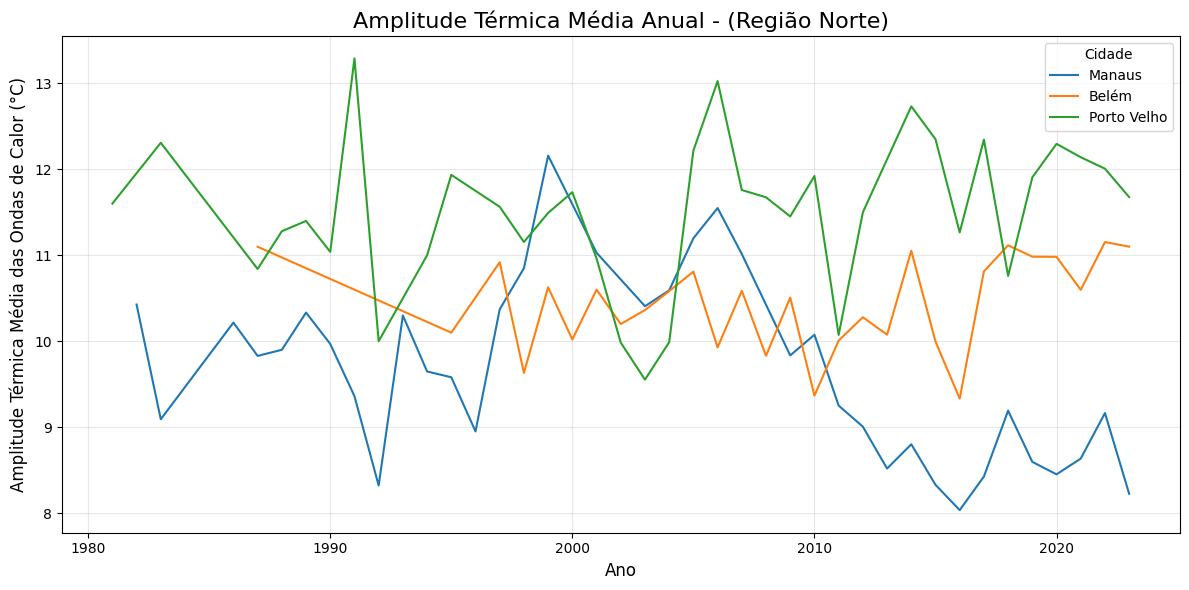

In [ ]:
# Filtrar os dados para as 3 cidades desejadas
cidades_selecionadas = ['Manaus', 'Belém', 'Porto Velho']
df_cidades_selecionadas = df[df['cidade'].isin(cidades_selecionadas)]

# Identificar os primeiros dias de cada onda de calor
df_cidades_selecionadas['primeiro_dia_hw'] = (df_cidades_selecionadas['isHW'] == True) & (df_cidades_selecionadas['isHW'].shift(1) == False)

# Filtrar apenas os primeiros dias das ondas de calor
df_primeiros_dias = df_cidades_selecionadas[df_cidades_selecionadas['primeiro_dia_hw']]

# Calcular a anomalia média anual considerando apenas os primeiros dias das ondas de calor
anomalia_media_anual = df_primeiros_dias.groupby(['cidade', 'year'])['MTR'].mean().reset_index()

# Criar o gráfico de linha
plt.figure(figsize=(12, 6))
for cidade in cidades_selecionadas:
    dados_cidade = anomalia_media_anual[anomalia_media_anual['cidade'] == cidade]
    plt.plot(dados_cidade['year'], dados_cidade['MTR'], label=cidade)

# Adicionar rótulos e título
plt.title('Amplitude Térmica Média Anual - (Região Norte)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Amplitude Térmica Média das Ondas de Calor (°C)', fontsize=12)
plt.legend(title='Cidade', fontsize=10)
plt.grid(alpha=0.3)

# Mostrar o gráfico
plt.tight_layout()
plt.show()

# Anomalia de temperatura média das OC

In [ ]:
# Calcular a anomalia de temperatura média das ondas de calor
# Reutilizando a lógica para identificar os primeiros dias de cada onda de calor
df['primeiro_dia_hw'] = (df['isHW'] == True) & (df['isHW'].shift(1) == False)

# Filtrar apenas os primeiros dias de cada onda de calor
df_primeiros_dias = df[df['primeiro_dia_hw']]

# Calcular a média da anomalia de temperatura (mean_temp_anom) para cada cidade e período
mean_temp_anom_hw = df_primeiros_dias.groupby(['cidade', 'periodo'])['mean_temp_anom'].mean().reset_index()

# Pivotar a tabela para melhor visualização
mean_temp_anom_hw_pivot = mean_temp_anom_hw.pivot(index='cidade', columns='periodo', values='mean_temp_anom')

# Exibir a tabela no notebook
print(mean_temp_anom_hw_pivot)

# Exportar a tabela para um arquivo Excel
arquivo_excel = 'anomalia_temp_media_oc.xlsx'
mean_temp_anom_hw_pivot.to_excel(arquivo_excel)

# Fazer o download do arquivo no Google Colab
from google.colab import files
files.download(arquivo_excel)

periodo         1981-1990  1991-2000  2001-2010  2011-2023
cidade                                                    
Belo Horizonte   3.818213   3.404321   3.467752   3.916749
Belém            1.877083   1.607458   1.317975   1.826863
Brasília         3.000795   2.881166   2.912020   3.809606
Campo Grande     4.456471   4.442610   4.619538   4.662380
Curitiba         3.812508   3.478267   3.757010   4.108223
Florianópolis    2.686835   2.834836   2.768000   2.876084
Fortaleza        1.416409   1.190499   0.933002   0.847791
Goiânia          3.091089   3.118839   3.007210   3.687920
Manaus           1.976889   1.626652   2.796375   2.153629
Porto Alegre     3.141714   3.995412   3.558060   3.922389
Porto Velho      2.106501   2.381271   2.006585   2.689384
Recife           1.086725   0.696998   1.162159   1.710053
Rio de Janeiro   3.113810   3.234784   3.716408   3.389027
Salvador         0.852335   1.128290   1.795794   1.908512
São Paulo        3.529417   3.835067   4.177191   4.7765

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-17-5f506b729eaa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cidades_selecionadas['primeiro_dia_hw'] = (df_cidades_selecionadas['isHW'] == True) & (df_cidades_selecionadas['isHW'].shift(1) == False)


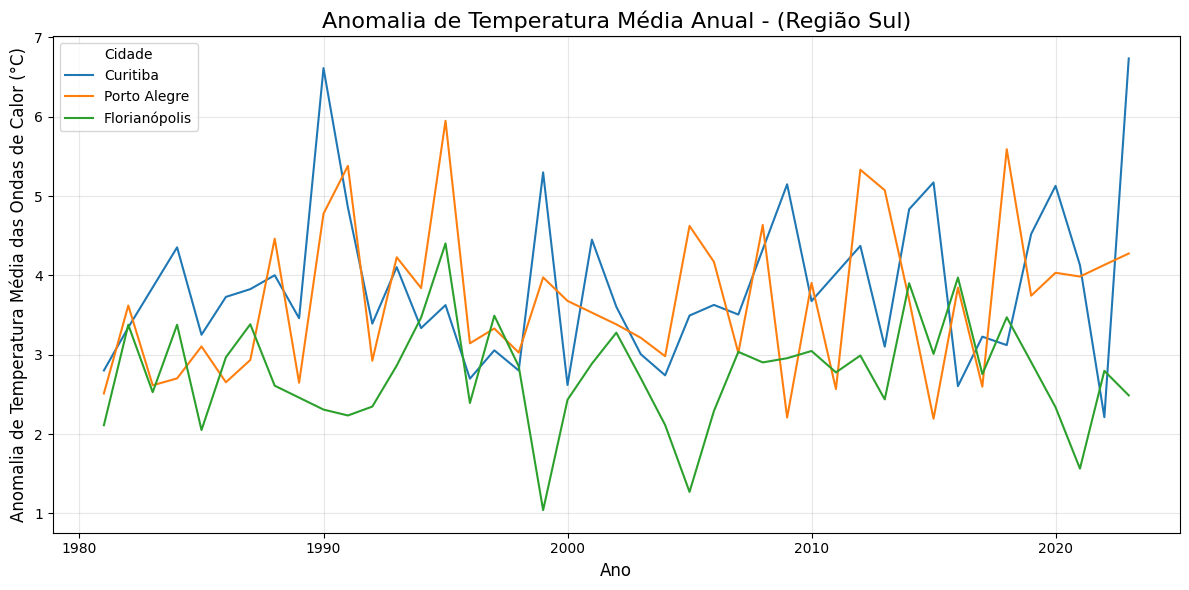

In [ ]:
# Filtrar os dados para as 3 cidades desejadas
cidades_selecionadas = ['Curitiba', 'Porto Alegre', 'Florianópolis']
df_cidades_selecionadas = df[df['cidade'].isin(cidades_selecionadas)]

# Identificar os primeiros dias de cada onda de calor
df_cidades_selecionadas['primeiro_dia_hw'] = (df_cidades_selecionadas['isHW'] == True) & (df_cidades_selecionadas['isHW'].shift(1) == False)

# Filtrar apenas os primeiros dias das ondas de calor
df_primeiros_dias = df_cidades_selecionadas[df_cidades_selecionadas['primeiro_dia_hw']]

# Calcular a anomalia média anual considerando apenas os primeiros dias das ondas de calor
anomalia_media_anual = df_primeiros_dias.groupby(['cidade', 'year'])['mean_temp_anom'].mean().reset_index()

# Criar o gráfico de linha
plt.figure(figsize=(12, 6))
for cidade in cidades_selecionadas:
    dados_cidade = anomalia_media_anual[anomalia_media_anual['cidade'] == cidade]
    plt.plot(dados_cidade['year'], dados_cidade['mean_temp_anom'], label=cidade)

# Adicionar rótulos e título
plt.title('Anomalia de Temperatura Média Anual - (Região Sul)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Anomalia de Temperatura Média das Ondas de Calor (°C)', fontsize=12)
plt.legend(title='Cidade', fontsize=10)
plt.grid(alpha=0.3)

# Mostrar o gráfico
plt.tight_layout()
plt.show()